In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving myPCA.py to myPCA.py
Saving USvideos.csv to USvideos.csv


In [3]:
data = pd.read_csv("USvideos.csv")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Question #1
How many empty entries we have for each attributes (5%)?

In [4]:
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Question #2
What are the average values of "likes","dislikes","views","comment_count“ in 2017? (10%)

In [5]:
data["publish_time"] = pd.to_datetime(data["publish_time"])
data.groupby(data.publish_time.dt.year).mean()
#year_2017.tail()
#year_2017.mean()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
publish_time,,,,,,,,
2006,24.000000,2.585060e+05,459.000000,152.000000,82.000000,0.000000,0.000000,0.000000
2008,6.727273,5.705455e+04,208.636364,3.909091,49.909091,0.000000,0.000000,0.000000
2009,13.928571,2.446900e+04,118.071429,1.071429,12.642857,0.000000,0.000000,0.000000
2010,16.368421,5.297821e+04,147.052632,13.473684,41.052632,0.000000,0.000000,0.000000
2011,19.851852,4.349544e+04,376.407407,118.740741,164.888889,0.000000,0.000000,0.000000
2012,20.750000,6.792433e+04,288.791667,8.583333,46.916667,0.000000,0.000000,0.000000
2013,21.000000,2.724989e+04,91.022727,14.931818,11.772727,0.000000,0.000000,0.000000
2014,15.468750,8.495266e+04,704.906250,40.343750,168.937500,0.000000,0.000000,0.000000
2015,14.142857,9.482117e+04,1684.000000,29.200000,200.771429,0.085714,0.000000,0.000000


Question #3
Plot the boxplot of #dislikes for each month in 2017. (10%)

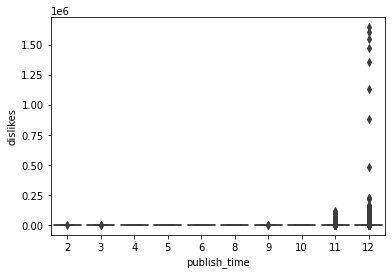

In [49]:
year_2017 = data[data.publish_time.dt.year == int(2017)]
#year_2017.head()
sns.boxplot(data = year_2017, y="dislikes", x=year_2017.publish_time.dt.month)
plt.show()

Question #4 Plot the histogram of #views for each category in 2017 and 2018 in one figure. (10%)

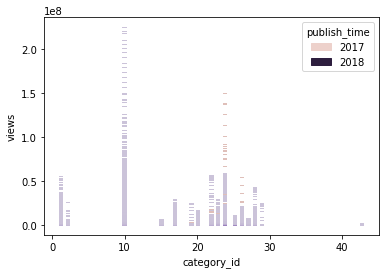

In [50]:
year_2018 = data[data.publish_time.dt.year == int(2018)]
frames = [year_2017, year_2018]
year_1718 = pd.concat(frames)
sns.histplot(data=year_1718, y=year_1718["views"], x=year_1718["category_id"], hue=year_1718.publish_time.dt.year, multiple="dodge", shrink=.8)


 Question #5 Write a myPCA.py from scratch. (50%)

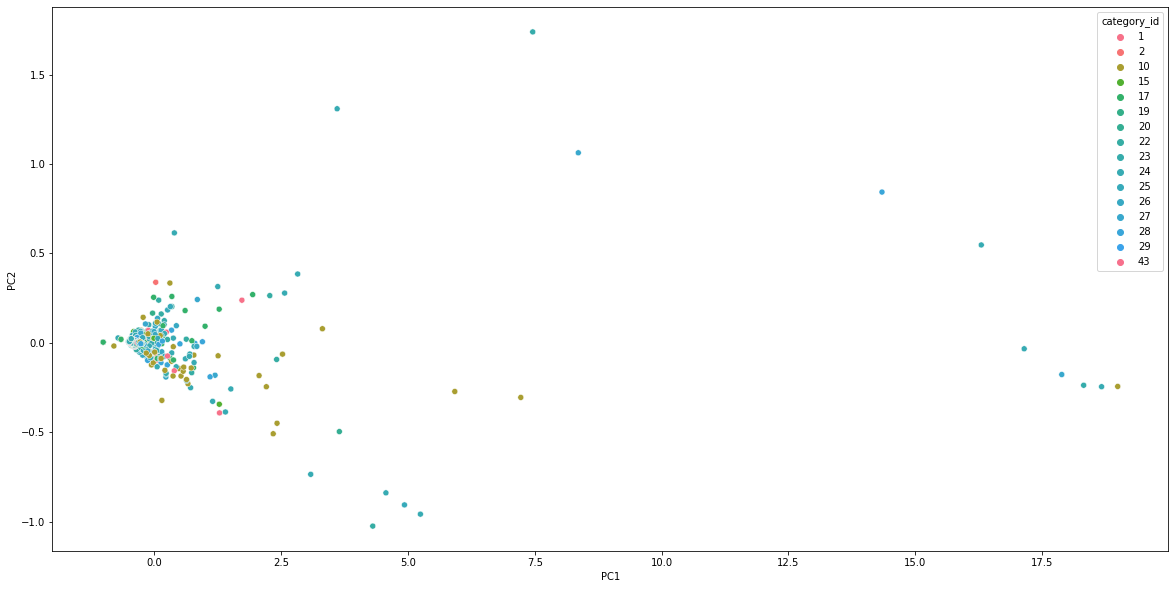

In [36]:
from myPCA import pca

column_list = ["category_id", "views", "likes", "dislikes", "comment_count", "comments_disabled", "ratings_disabled", "video_error_or_removed"]
pca_data = pd.read_csv("USvideos.csv", usecols=column_list)
pca_data = pca_data.groupby("category_id").apply(lambda x: x.sample(50)).reset_index(drop=True)
result = pca(pca_data, 2)
plt.figure(figsize=(20, 10))
sns.scatterplot(data=result, x="PC1", y="PC2", hue=data["category_id"], palette="husl", legend="full")

Question #6 Plot the word cloud of “title”. (15%)

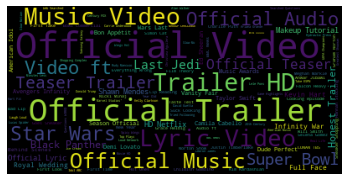

In [9]:
from wordcloud import WordCloud

wc = WordCloud().generate(" ".join(data["title"]))
plt.imshow(wc)
plt.axis("off")
plt.show()
